In [1]:
'''Import packages'''
'''Requires numpy, pandas, scikit-learn, and matplotlib/seaborn'''
import numpy as np
import pandas as pd
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import Lasso
from scipy.stats import linregress

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("ticks")

'''Import script which contains functions'''
import analysis_functions
from analysis_functions import get_r2
from analysis_functions import get_lassoCV
from analysis_functions import perform_randomizedLasso

from IPython.display import display, HTML


/home/prubbens/miniconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
data_abs = pd.read_csv('data/Chloroplasts_removed/ByLake_Filtering/5in10/michigan/michigan_absolute_otu_5in10.tsv', sep=' ', index_col=None, header=0, float_precision='high')
data_rel = pd.read_csv('data/Chloroplasts_removed/ByLake_Filtering/5in10/michigan/michigan_relative_otu_5in10.tsv', sep=' ', index_col=None, header=0, float_precision='high')
scores_hna = pd.read_csv('Scores/hnascores_otus_5seq10_clr_Michigan.csv', index_col=0, header=0)
scores_lna = pd.read_csv('Scores/lnascores_otus_5seq10_clr_Michigan.csv', index_col=0, header=0)

In [3]:
def return_otus_score(df_score,thr): 
    return df_score[df_score.iloc[:,0] > thr].index

In [4]:
def calc_sum_abun(df_abun):
    return df_abun.sum(axis=1)

def calc_div_D0(otus): 
    return len(otus)

def D2(df): 
    df_sum = df.sum(axis=1)
    df_final = (df.div(df_sum, axis=0))**2
    df_final['D2'] = 1./df_final.sum(axis=1)
    return(df_final)

In [5]:
thrs = np.arange(0,1,0.01)
hna_d0 = np.zeros(len(thrs))
hna_d2 = np.zeros(len(thrs))
lna_d0 = np.zeros(len(thrs))
lna_d2 = np.zeros(len(thrs))
hna_rel_abun = np.zeros(len(thrs))
hna_abs_abun = np.zeros(len(thrs))
lna_rel_abun = np.zeros(len(thrs))
lna_abs_abun = np.zeros(len(thrs))

In [6]:
i=0
for thr in thrs: 
    otus_hna = return_otus_score(scores_hna,thr)
    otus_lna = return_otus_score(scores_lna,thr)
    hna_d0[i] = calc_div_D0(otus_hna)
    lna_d0[i] = calc_div_D0(otus_lna)
    hna_d2[i] = D2(data_rel.loc[:,otus_hna])['D2'].mean()
    lna_d2[i] = D2(data_rel.loc[:,otus_lna])['D2'].mean()
    
    hna_abs_abun[i] = calc_sum_abun(data_abs.loc[:,otus_hna]).mean()
    hna_rel_abun[i] = calc_sum_abun(data_rel.loc[:,otus_hna]).mean()
    lna_abs_abun[i] = calc_sum_abun(data_abs.loc[:,otus_lna]).mean()
    lna_rel_abun[i] = calc_sum_abun(data_rel.loc[:,otus_lna]).mean()
    
    i+=1

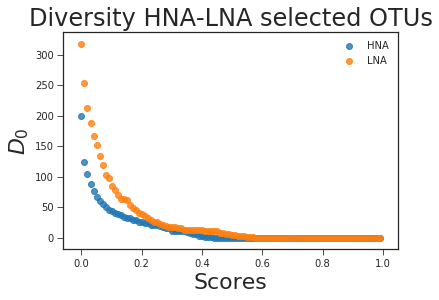

In [7]:
plt.figure()
sns.regplot(x=thrs,y=hna_d0, fit_reg=False, label='HNA')
sns.regplot(x=thrs,y=lna_d0, fit_reg=False, label='LNA')
plt.xlabel('Scores', size=22)
plt.xticks(size=10)
plt.ylabel(r'$D_0$', size=22)
plt.yticks(size=10)
plt.title('Diversity HNA-LNA selected OTUs', size=24)
plt.legend()
plt.show()

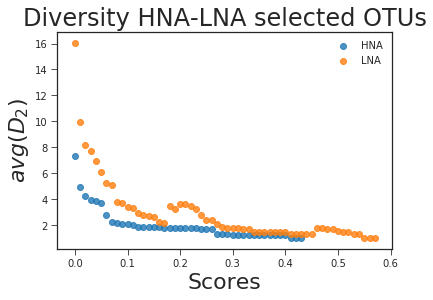

In [8]:
plt.figure()
sns.regplot(x=thrs,y=hna_d2, fit_reg=False, label='HNA')
sns.regplot(x=thrs,y=lna_d2, fit_reg=False, label='LNA')
plt.xlabel('Scores', size=22)
plt.xticks(size=10)
#plt.yscale('log')
plt.ylabel(r'$avg(D_2)$', size=22)
plt.yticks(size=10)
plt.title('Diversity HNA-LNA selected OTUs', size=24)
plt.legend()
plt.show()

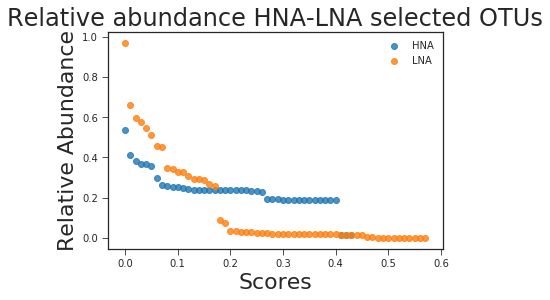

In [9]:
plt.figure()
sns.regplot(x=thrs,y=hna_rel_abun, fit_reg=False, label='HNA')
sns.regplot(x=thrs,y=lna_rel_abun, fit_reg=False, label='LNA')
plt.xlabel('Scores', size=22)
plt.xticks(size=10)
#plt.yscale('log')
plt.ylabel('Relative Abundance', size=22)
plt.yticks(size=10)
plt.title('Relative abundance HNA-LNA selected OTUs', size=24)
plt.legend()
plt.show()

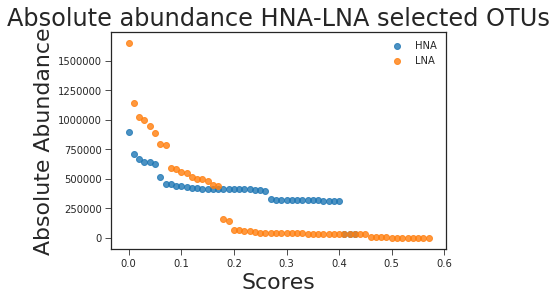

In [10]:
plt.figure()
sns.regplot(x=thrs,y=hna_abs_abun, fit_reg=False, label='HNA')
sns.regplot(x=thrs,y=lna_abs_abun, fit_reg=False, label='LNA')
plt.xlabel('Scores', size=22)
plt.xticks(size=10)
#plt.yscale('log')
plt.ylabel('Absolute Abundance', size=22)
plt.yticks(size=10)
plt.title('Absolute abundance HNA-LNA selected OTUs', size=24)
plt.legend()
plt.show()